# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importing Dataset

In [2]:
dataset = pd.read_excel('Data.xlsx')
dataset["target"] = dataset.shift(-1)["Maximum Temperature (2 m)"]  # added new column
dataset.head()

,Date,Maximum Temperature (2 m),Minimum Temperature (2 m),Mean Temperature (2 m),Maximum Apparent Temperature (2 m),Minimum Apparent Temperature (2 m),Mean Apparent Temperature (2 m),Daylight Duration,Sunshine Duration,Precipitation Sum,Rain Sum,Snowfall Sum,Precipitation Hours,Maximum Wind Speed (10 m),Maximum Wind Gusts (10 m),Dominant Wind Direction (10 m),Shortwave Radiation Sum,Reference Evapotranspiration (ET₀),target
0,01-01-2013,14.083500,3.7335,8.950167,12.713732,1.381373,7.357364,36833.835938,24803.417969,0.0,0.0,0.0,0,4.896530,18.719999,63.435070,9.57,1.446761,15.183500
1,02-01-2013,15.183500,2.2335,8.737666,13.621058,-0.357877,6.970407,36864.074219,33722.210938,0.0,0.0,0.0,0,7.968939,22.319998,292.285645,13.36,1.916086,15.383499
2,03-01-2013,15.383499,1.5335,8.252251,14.018192,-1.336557,6.289677,36896.656250,33757.539062,0.0,0.0,0.0,0,6.193674,20.880001,5.289918,14.04,2.009175,15.133499
3,04-01-2013,15.133499,1.6835,8.004333,13.565754,-0.971467,6.108648,36931.539062,33795.355469,0.0,0.0,0.0,0,7.386582,21.959999,288.436676,14.42,2.031897,13.983500
4,05-01-2013,13.983500,1.1335,7.333499,12.264828,-1.559653,5.289984,36968.667969,33835.617188,0.0,0.0,0.0,0,7.636753,23.400000,210.963516,14.28,1.958701,14.633499


In [3]:
x = dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values 
y = dataset.iloc[:,-1].values
y= y.reshape(-1,1)
print(y)

[[15.18350029]
 [15.38349915]
 [15.13349915]
 ...
 [20.83950043]
 [        nan]
 [        nan]]


# Dealing with invalid Dataset

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan,strategy='most_frequent')
x = imputer.fit_transform(x)
y= imputer.fit_transform(y)

print(y)


[[15.18350029]
 [15.38349915]
 [15.13349915]
 ...
 [20.83950043]
 [28.28949928]
 [28.28949928]]


# feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y)

print(x)

[[-2.0675188  -1.67980483 -1.8756014  ... -1.47864785 -1.41402626
  -1.87758632]
 [-1.87603386 -1.90325662 -1.91051778 ... -0.74854352 -1.10004752
  -1.84275353]
 [-1.84121863 -2.00753413 -1.99027733 ... -0.61754848 -1.03777099
  -1.88629476]
 ...
 [-0.60422619 -0.4871681  -0.61352144 ... -1.68862512 -1.07877107
  -0.89250939]
 [-0.89145344 -0.42758101 -0.82507328 ... -1.75412245 -1.19850853
   0.40501921]
 [ 0.40542119  1.15892668 -1.44569302 ... -0.67148754 -2.0759106
   0.40501921]]


# Splitting Dataset into Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(y_train)


[[ 1.48379723]
 [ 0.84914001]
 [ 0.6923913 ]
 ...
 [ 0.70109975]
 [-0.84896816]
 [ 0.97105527]]


In [7]:
from sklearn.svm import SVR

# Instantiate SVR

svm_regressor = SVR(kernel='rbf', C=150, gamma=0.1)  # You may need to adjust parameters based on your data
y_train_1d = y_train.ravel()

# Fit the SVR model to the training data
svm_regressor.fit(x_train, y_train_1d)

SVR(C=150, gamma=0.1)

In [8]:
svm_regressor.score(x_train,y_train)

0.9973218903972018

In [9]:
y_pred = svm_regressor.predict(x_test)

In [10]:
y_test =y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)


In [11]:
df = np.concatenate((y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorow','prediction of Rain'])
dataframe['diff'] = dataframe['Rain on Tommorow'] - dataframe['prediction of Rain']
dataframe

,Rain on Tommorow,prediction of Rain,diff
0,0.422436,0.400117,0.022319
1,-0.909926,-0.975331,0.065405
2,0.535643,0.536594,-0.000951
3,0.805599,0.848099,-0.042500
4,0.291812,0.346197,-0.054385
...,...,...,...
811,1.084262,0.898729,0.185533
812,-1.136341,-1.135951,-0.000389
813,-1.720838,-1.703656,-0.017182
814,0.735933,0.749905,-0.013972


# calculating accuracy

In [12]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.053082840633751995


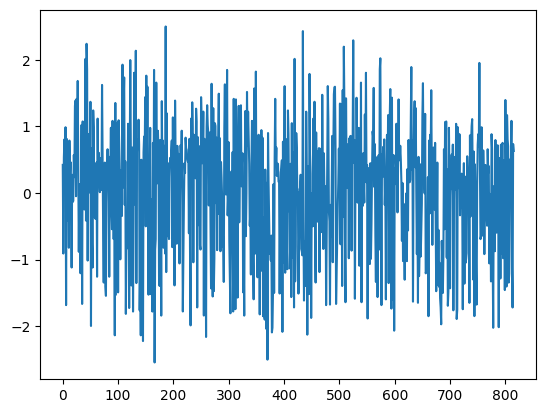

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_test)


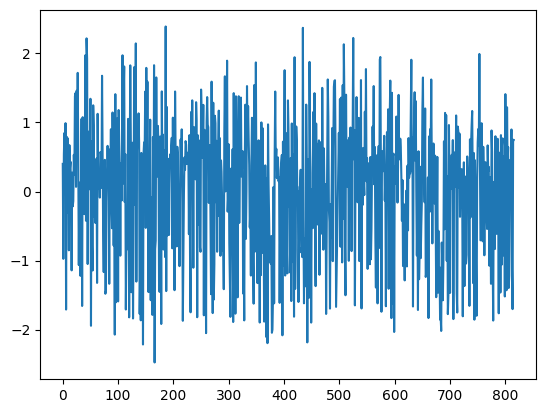

In [14]:
plt.plot(y_pred)